In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
%matplotlib inline

### Import Dataset

In [3]:
df = pd.read_csv('laptops.csv',encoding='latin-1')

In [4]:
df

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [5]:
df.rename(columns={'Unnamed: 0': 'Index'},inplace=True)

### Checking Missing values

In [6]:
df.isna().sum()

Index               0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

#### As we can see we have no missing values, we can begin our Exploratory Data Analysis

## Lets's check Number of Laptops by their Type

In [7]:
lap_by_type = df.groupby(['TypeName']).count().reset_index().sort_values(by='Index',ascending=False)
lap_by_type

,TypeName,Index,Company,Product,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
3,Notebook,727,727,727,727,727,727,727,727,727,727,727,727
1,Gaming,205,205,205,205,205,205,205,205,205,205,205,205
4,Ultrabook,196,196,196,196,196,196,196,196,196,196,196,196
0,2 in 1 Convertible,121,121,121,121,121,121,121,121,121,121,121,121
5,Workstation,29,29,29,29,29,29,29,29,29,29,29,29
2,Netbook,25,25,25,25,25,25,25,25,25,25,25,25


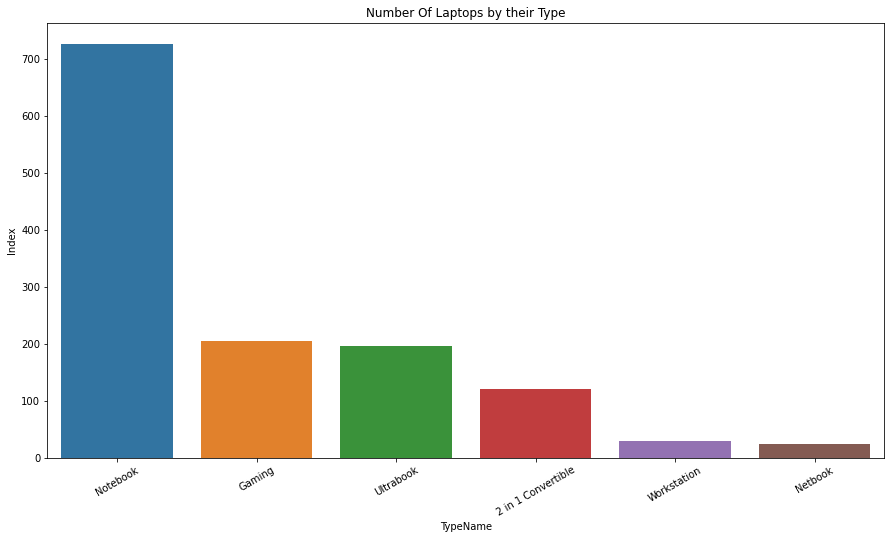

In [8]:
f = plt.figure(figsize=(15,8))
sns.barplot(x=lap_by_type['TypeName'], y=lap_by_type['Index'])
plt.xticks(rotation=30)
plt.title("Number Of Laptops by their Type")
plt.show()

#### We have maximum laptops of type Notebook.

## Let's Check Number of Laptops by a Company Name

In [9]:
lap_by_Comp = df.groupby(['Company']).count().reset_index().sort_values(by='Product',ascending=False)

In [10]:
lap_by_Comp

,Company,Index,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
4,Dell,297,297,297,297,297,297,297,297,297,297,297,297
10,Lenovo,297,297,297,297,297,297,297,297,297,297,297,297
7,HP,274,274,274,274,274,274,274,274,274,274,274,274
2,Asus,158,158,158,158,158,158,158,158,158,158,158,158
0,Acer,103,103,103,103,103,103,103,103,103,103,103,103
11,MSI,54,54,54,54,54,54,54,54,54,54,54,54
16,Toshiba,48,48,48,48,48,48,48,48,48,48,48,48
1,Apple,21,21,21,21,21,21,21,21,21,21,21,21
15,Samsung,9,9,9,9,9,9,9,9,9,9,9,9
14,Razer,7,7,7,7,7,7,7,7,7,7,7,7


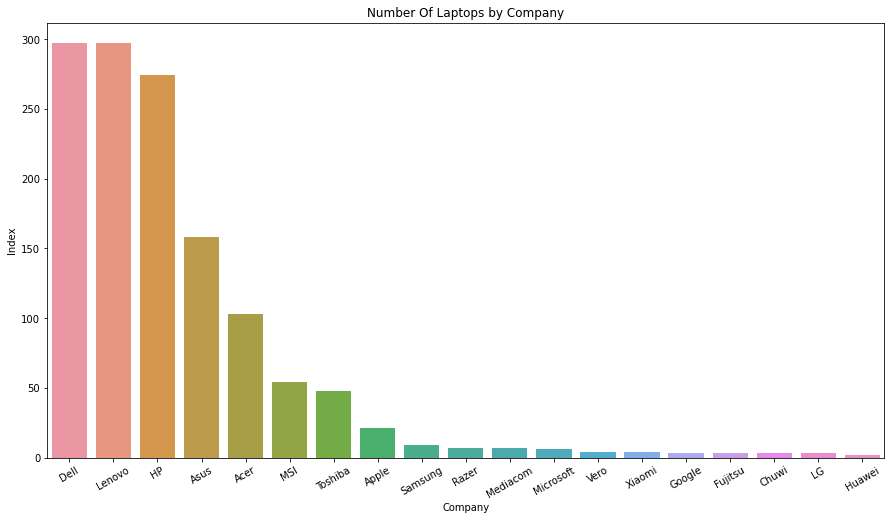

In [11]:
f = plt.figure(figsize=(15,8))
sns.barplot(x=lap_by_Comp['Company'], y=lap_by_Comp['Index'])
plt.xticks(rotation=30)
plt.title("Number Of Laptops by Company")
plt.show()

#### Dell, Lenovo and HP has more number of laptops as compare to other companies

In [12]:
df

,Index,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


### Laptops by their screen size

In [13]:
df['Inches'] = df['Inches'].astype(str) # we should change it's data type in order to use group by 
lap_by_screen = df.groupby(['Inches']).count().reset_index().sort_values(by='Product',ascending=False)
lap_by_screen

,Inches,Index,Company,Product,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
14,15.6,665,665,665,665,665,665,665,665,665,665,665,665
10,14.0,197,197,197,197,197,197,197,197,197,197,197,197
16,17.3,164,164,164,164,164,164,164,164,164,164,164,164
7,13.3,164,164,164,164,164,164,164,164,164,164,164,164
5,12.5,39,39,39,39,39,39,39,39,39,39,39,39
2,11.6,33,33,33,33,33,33,33,33,33,33,33,33
9,13.9,6,6,6,6,6,6,6,6,6,6,6,6
3,12.0,6,6,6,6,6,6,6,6,6,6,6,6
8,13.5,6,6,6,6,6,6,6,6,6,6,6,6
4,12.3,5,5,5,5,5,5,5,5,5,5,5,5


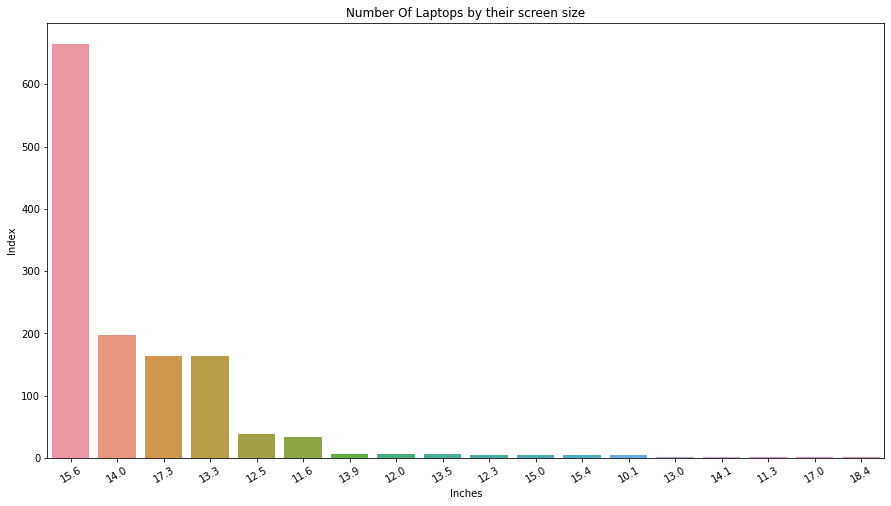

In [14]:

f = plt.figure(figsize=(15,8))
sns.barplot(x=lap_by_screen['Inches'], y=lap_by_screen['Index'])
plt.xticks(rotation=30)
plt.title("Number Of Laptops by their screen size")
plt.show()

In [15]:
lap_by_cpu = df.groupby(['Cpu']).count().reset_index().sort_values(by='Product',ascending=False).head(25)
lap_by_cpu

,Cpu,Index,Company,Product,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price_euros
74,Intel Core i5 7200U 2.5GHz,190,190,190,190,190,190,190,190,190,190,190,190
102,Intel Core i7 7700HQ 2.8GHz,146,146,146,146,146,146,146,146,146,146,146,146
97,Intel Core i7 7500U 2.7GHz,134,134,134,134,134,134,134,134,134,134,134,134
106,Intel Core i7 8550U 1.8GHz,73,73,73,73,73,73,73,73,73,73,73,73
83,Intel Core i5 8250U 1.6GHz,72,72,72,72,72,72,72,72,72,72,72,72
68,Intel Core i5 6200U 2.3GHz,68,68,68,68,68,68,68,68,68,68,68,68
56,Intel Core i3 6006U 2GHz,64,64,64,64,64,64,64,64,64,64,64,64
89,Intel Core i7 6500U 2.5GHz,49,49,49,49,49,49,49,49,49,49,49,49
92,Intel Core i7 6700HQ 2.6GHz,43,43,43,43,43,43,43,43,43,43,43,43
59,Intel Core i3 7100U 2.4GHz,37,37,37,37,37,37,37,37,37,37,37,37


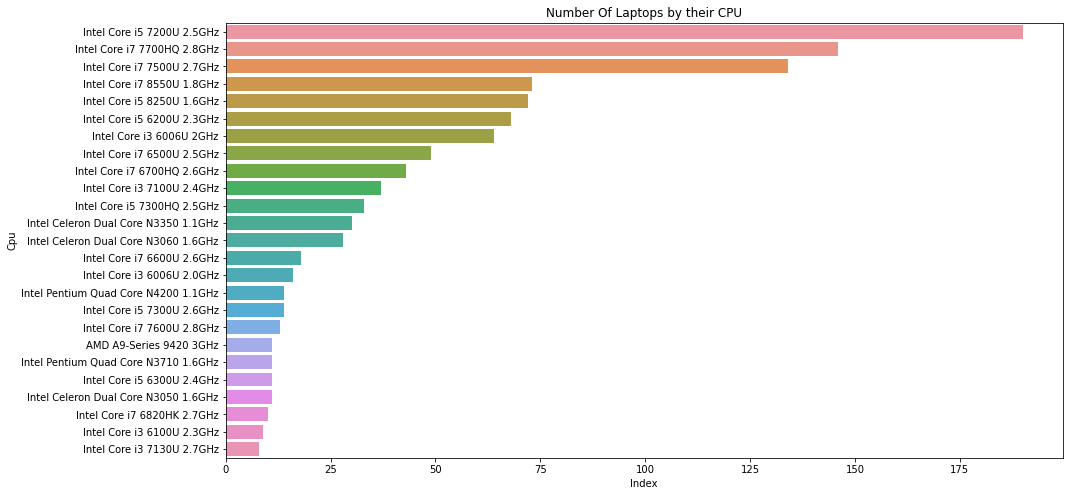

In [16]:

f = plt.figure(figsize=(15,8))
sns.barplot(y=lap_by_cpu['Cpu'], x=lap_by_cpu['Index'])
# plt.xticks(rotation=20)
plt.title("Number Of Laptops by their CPU")
plt.show()

### Majority of laptops has i5 CPU

### Let's check laptops by thier OS 

In [17]:
df.columns

Index(['Index', 'Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price_euros'],
      dtype='object')

In [18]:
lap_by_sys = df.groupby(['OpSys']).count().reset_index().sort_values(by='Index', ascending=False)

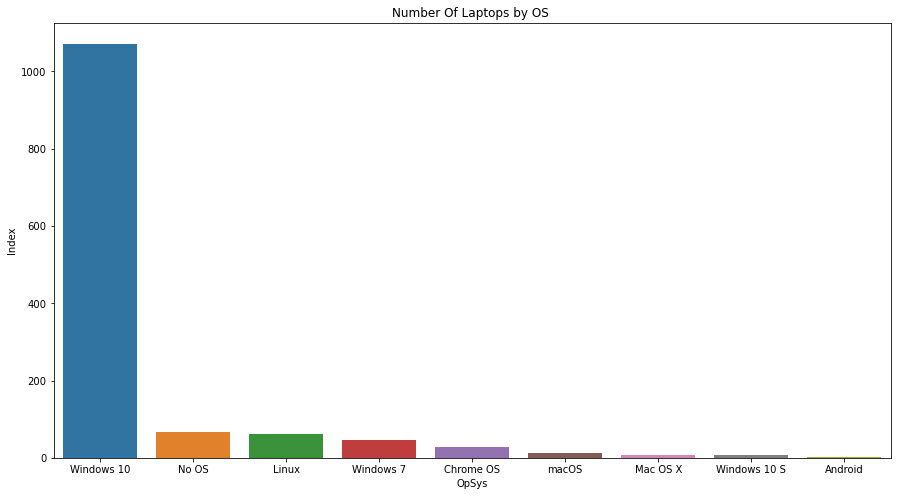

In [19]:

f = plt.figure(figsize=(15,8))
sns.barplot(x=lap_by_sys['OpSys'], y=lap_by_sys['Index'])
# plt.xticks(rotation=20)
plt.title("Number Of Laptops by OS ")
plt.show()

### Major Laptops are runs on windows